In [3]:
import pandas as pd 
import numpy as np 
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os
 

# Gathering Data 

Now, we will be collecting records from Twitter archeive dataset provided by udacity.

In [4]:
df_twitter=pd.read_csv('twitter-archive-enhanced.csv')
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**Next process would be to fetch the record by using request library for image predcition data that udacity has provided**

In [5]:
url = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")

In [6]:
with open ('ImagePredictions.tsv',mode='wb')as file:
    file.write(url.content)

In [7]:
df_image_predictions=pd.read_csv('ImagePredictions.tsv',sep='\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Now reterving data from Twitter using API


In [8]:
consumer_key = 'YEc6kmz3fvmu4ctHGUlZrwbIW'
consumer_secret = 'yusedJI7zd1uEddybIJi580ilhel5mSKn5CeuNoo6oTmgBnv7y'
access_token = '1369768302063407107-lzUV2XnNKvP0x9ORWKKIvyRedZSFXW'
access_secret = 'DjGRqFtkG9vu8BYsy6tI01r4v5X3ilb9f8YtvM0UwQ2bf'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)


##  creating json file 

In [9]:
missingtweet=[]
notmissingtweet=[]
with open ('tweet_json.txt', 'a') as file:
    for tweetid in df_twitter['tweet_id']:
        try:
            tweet = api.get_status(tweetid, tweet_mode='extended')._json
            # writes one tweet per line
            file.write(json.dumps(tweet) + '\n')
            missingtweet.append(tweetid)
        except Exception as exp:
            notmissingtweet.append(tweetid)

In [10]:
notmissingtweet

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 851953902622658560,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837366284874571778,
 837012587749474308,
 829374341691346946,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 779123168116150273,
 775096608509886464,
 771004394259247104,
 770743923962707968,
 759566828574212096,
 758740312047005698,
 758474966123810816,
 758467244762497024,
 758405701903519748,
 758355060040593408,
 758099635764359168,
 758041019896193024,
 757741869644341248,
 757729163776290825,
 757725642876129280,
 757611664640446465,
 757597904299253760,
 757596066325864448,
 757400162377592832,
 757393109802180609,
 757354760399941633,
 756998049151549440,
 756939218950160384,
 756651752796094464,
 756526248105566208,
 756303284449767430,
 756288534030475264,
 756275833623502848,
 755955933503782912,
 755206590534

## converting json file into dataframe and only using the column that is necessary

In [11]:
dftweet=[]
with open('tweet_json.txt')as jfile:
    for line in jfile:
        dire=json.loads(line)
        dftweet.append({'tweet_id':dire['id'],'retweetcount':dire['retweet_count'],'favcount':dire['favorite_count']})

In [12]:
df_tw=pd.DataFrame(dftweet)
df_tw.head()

,favcount,retweetcount,tweet_id
0,34909,7328,892420643555336193
1,30230,5472,892177421306343426
2,22753,3620,891815181378084864
3,38152,7513,891689557279858688
4,36425,8085,891327558926688256


## Data Assessment

In [13]:
df_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


## Cleaning Data

In [14]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
df_twitter['doggo'].str.contains('None').sum()

2259

In [16]:
df_twitter['floofer'].str.contains('None').sum()

2346

In [17]:
df_twitter['pupper'].str.contains('None').sum()

2099

In [18]:
df_twitter['puppo'].str.contains('None').sum()

2326

In [19]:
df_twitter[['text','name']]

,text,name
0,This is Phineas. He's a mystical boy. Only eve...,Phineas
1,This is Tilly. She's just checking pup on you....,Tilly
2,This is Archie. He is a rare Norwegian Pouncin...,Archie
3,This is Darla. She commenced a snooze mid meal...,Darla
4,This is Franklin. He would like you to stop ca...,Franklin
5,Here we have a majestic great white breaching ...,None
6,Meet Jax. He enjoys ice cream so much he gets ...,Jax
7,When you watch your owner call another dog a g...,None
8,This is Zoey. She doesn't want to be one of th...,Zoey
9,This is Cassie. She is a college pup. Studying...,Cassie


In [20]:
df_twitter[df_twitter.name=='None'].text

5       Here we have a majestic great white breaching ...
7       When you watch your owner call another dog a g...
12      Here's a puppo that seems to be on the fence a...
24      You may not have known you needed to see this ...
25      This... is a Jubilant Antarctic House Bear. We...
30      @NonWhiteHat @MayhewMayhem omg hello tanner yo...
32      RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...
35      I have a new hero and his name is Howard. 14/1...
37      Here we have a corgi undercover as a malamute....
41      I present to you, Pup in Hat. Pup in Hat is gr...
42      OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...
47      Please only send dogs. We don't rate mechanics...
55      @roushfenway These are good dogs but 17/10 is ...
59      Ugh not again. We only rate dogs. Please don't...
62      Please don't send in photos without dogs in th...
64                        @RealKentMurphy 14/10 confirmed
72      Martha is stunning how h*ckin dare you. 13/10 ...
78      RT @ra

In [21]:
df_twitter.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Oliver           11
Lucy             11
Lola             10
Penny            10
Tucker           10
Winston           9
Bo                9
Sadie             8
the               8
Bailey            7
Buddy             7
an                7
Daisy             7
Toby              7
Bella             6
Jax               6
Oscar             6
Dave              6
Milo              6
Scout             6
Rusty             6
Stanley           6
Leo               6
Koda              6
Jack              6
Sammy             5
               ... 
Stella            1
Strider           1
Kona              1
Cal               1
Brady             1
Erik              1
Remy              1
Taz               1
Poppy             1
Sully             1
all               1
Buddah            1
Wafer             1
Crumpet           1
Craig             1
Baron             1
Eugene            1
Georgie           1
Snicku            1


In [22]:
df_twitter['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [23]:
df_twitter.expanded_urls.isnull().sum()

59

In [24]:
df_twitter['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [25]:
df_twitter.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [26]:
df_twitter['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [27]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [28]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [30]:
df_image_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
Cardigan                      19
web_site                      19
Maltese_dog                   18
Eskimo_dog                    18
beagle                        18
teddy                         18
Shetland_sheepdog             18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [31]:
df_tw

,favcount,retweetcount,tweet_id
0,34909,7328,892420643555336193
1,30230,5472,892177421306343426
2,22753,3620,891815181378084864
3,38152,7513,891689557279858688
4,36425,8085,891327558926688256
5,18374,2709,891087950875897856
6,10689,1752,890971913173991426
7,58762,16437,890729181411237888
8,25307,3761,890609185150312448
9,28870,6357,890240255349198849


In [32]:
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 3 columns):
favcount        1754 non-null int64
retweetcount    1754 non-null int64
tweet_id        1754 non-null int64
dtypes: int64(3)
memory usage: 41.2 KB


In [33]:
df_tw.describe()

,favcount,retweetcount,tweet_id
count,1754.000000,1754.000000,1.754000e+03
mean,13382.804447,4528.088369,8.200861e+17
std,14053.825383,5100.034847,3.692064e+16
min,0.000000,1.000000,7.588287e+17
25%,5046.000000,1885.000000,7.895309e+17
50%,10224.000000,3103.000000,8.185365e+17
75%,18817.250000,5330.000000,8.482137e+17
max,128302.000000,53962.000000,8.924206e+17


### Cleaning Data 

 ### Quality Issues

<ul>
        <li> Drop all retweet data from df twitter to make sure that only original rating exist.
    </li>
    <li> Drop all replies data from df twitter to make sure that only original rating exist.</li>
    <li>In dataset df_twiteer there is an unnecessary column like in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp </li>
    <li>DataType of timestamp is not correct</li>
    <li>Missing info in expanded urls column that means it doesn't have image. </li>
    <li>There are missing name in df_twiteer</li>
    <li>Rating_denominator has some incorrected value becuasuse maximum value denominator can have is 10</li>
    <li>There is no consistency in dog name </li>
    <li>Columns name are not descriptive like p1,p2 </li>
    <li>Make the source content specific</li>
    </ul>

### Tidiness Issues 

<ul>
    <li>There are 3 different data frame that is used it can be merged into one . </li>
    <li>Dropping the 4 different column of dogtypes to include in one column. </li>
 <ul>

### Creating a copy of the datset 

In [34]:
dftwitterc=df_twitter.copy()

In [35]:
dfpredictionc=df_image_predictions.copy()

In [36]:
dftwc=df_tw.copy()

In [37]:
dftwittercopy=pd.DataFrame(dftwitterc)

In [38]:
dfpredictioncopy=pd.DataFrame(dfpredictionc)

In [39]:
dftwcopy=pd.DataFrame(dftwc)

## Quality Issue 

#### Define

##### 1.Drop all retweet  data from df twitter to make sure that only original rating exist.

#### Code

In [40]:
dftwittercopy=dftwittercopy[dftwittercopy.retweeted_status_id.isnull()]

#### Test

In [41]:
dftwittercopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### Define

##### 2.Drop all replies  data from df twitter to make sure that only original rating exist.

#### Code

In [42]:
dftwittercopy=dftwittercopy[dftwittercopy.in_reply_to_user_id.isnull()]

#### Test

In [43]:
dftwittercopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

#### Define

##### 3. In dataset df_twiteer there is an unnecessary column like in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp 

#### Code

In [44]:
dftwittercopy=dftwittercopy.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])

#### Test

In [45]:
dftwittercopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


#### Define

#### 4. DataType of timestamp is not correct

#### Code

In [46]:
dftwittercopy['timestamp']=pd.to_datetime(dftwittercopy['timestamp'])

#### Test

In [47]:
dftwittercopy['timestamp'].head()

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
2   2017-07-31 00:18:03+00:00
3   2017-07-30 15:58:51+00:00
4   2017-07-29 16:00:24+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

#### Define

####  5. Missing info in expanded urls column

#### Code

In [48]:
dftwittercopy=dftwittercopy.dropna(subset=['expanded_urls'])

#### Test

In [49]:
dftwittercopy.expanded_urls.isnull().sum()

0

#### Define

#### 6. Rating_denominator has some incorrected value

#### Code

In [50]:
dfcleandenom=dftwittercopy[dftwittercopy['rating_denominator'] >10]
dfcleandenom[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the flo...,84,70
902,758467244762497024,Why does this never happen at my front door......,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved sq...,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very pre...,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro...",45,50
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll ...,60,50


In [51]:
dearray=np.array(dfcleandenom['tweet_id'])

In [52]:
for b in dearray:
    dftwittercopy.loc[dftwittercopy.tweet_id == b, ['rating_denominator']] = 10


#### Test

In [53]:
dftwittercopy.loc[dftwittercopy.tweet_id==675853064436391936]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1843,675853064436391936,2015-12-13 01:41:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an entire platoon of puppers. Tot...,https://twitter.com/dog_rates/status/675853064...,88,10,None,None,None,None,None


#### Define

#### 7. Columns name are not descriptive like p1 and p2

#### Code

In [54]:
dfpredictioncopy.rename(columns={'p1':'Predection_First','p1_conf':'Confidence_First','p1_dog':'First_dog',
                                 
                    'p2':'Predection_Second','p2_conf':'Confidence_Second','p2_dog':'Second_dog',
                                 'p3':'Preidcition_Third','p3_conf':'Confidence_Third','p3_dog':'Third_dog'
                                
                                
                                })

,tweet_id,jpg_url,img_num,Predection_First,Confidence_First,First_dog,Predection_Second,Confidence_Second,Second_dog,Preidcition_Third,Confidence_Third,Third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### Test

In [55]:
dfpredictioncopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Define

#### 8.  Make sure source content be specific 

#### Code

In [56]:
dftwittercopy['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1962
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [57]:
dftwittercopy['source'] = dftwittercopy['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                                                                          'Twitter for iphone')
dftwittercopy['source'] =  dftwittercopy['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                                                                          'Vine - Make a Scene')
dftwittercopy['source'] =  dftwittercopy['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                                                                           'Twitter Web Client')
dftwittercopy['source'] =  dftwittercopy['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
                                                                           'TweetDeck')


#### Test

In [58]:
dftwittercopy['source'].value_counts()

Twitter for iphone     1962
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

##### Tidiness Issue

#### Define

### 1. Joining the 3 dataframe into one

##### Before joining the column I just need to rename the column so that i can join based on column name 

#### Code

In [59]:
df_whole_dataset=pd.merge(dftwittercopy, dfpredictioncopy,
                                   how = 'left', on=['tweet_id'])
# merge 'master_df_clean' and 'tweets_df_clean'
dfmerge = pd.merge(df_whole_dataset, dftwcopy,
                                   how = 'left', on=['tweet_id'])


#### Test

In [60]:
dfmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2785 entries, 0 to 2784
Data columns (total 25 columns):
tweet_id              2785 non-null int64
timestamp             2785 non-null datetime64[ns, UTC]
source                2785 non-null object
text                  2785 non-null object
expanded_urls         2785 non-null object
rating_numerator      2785 non-null int64
rating_denominator    2785 non-null int64
name                  2785 non-null object
doggo                 2785 non-null object
floofer               2785 non-null object
pupper                2785 non-null object
puppo                 2785 non-null object
jpg_url               2622 non-null object
img_num               2622 non-null float64
p1                    2622 non-null object
p1_conf               2622 non-null float64
p1_dog                2622 non-null object
p2                    2622 non-null object
p2_conf               2622 non-null float64
p2_dog                2622 non-null object
p3                  

#### Define

#### 2 . Dropping the 4 different column of dogtypes to include in one column. 

#### Code

In [61]:
dfmerge['dogtype']=dfmerge[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [62]:
dfmerge.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'])


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favcount,retweetcount,dogtype
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,False,bagel,0.085851,False,banana,0.076110,False,34909.0,7328.0,None
1,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,False,bagel,0.085851,False,banana,0.076110,False,34910.0,7328.0,None
2,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,True,Pekinese,0.090647,True,papillon,0.068957,True,30230.0,5472.0,None
3,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,True,Pekinese,0.090647,True,papillon,0.068957,True,30230.0,5472.0,None
4,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,True,malamute,0.078253,True,kelpie,0.031379,True,22753.0,3620.0,None
5,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,True,malamute,0.078253,True,kelpie,0.031379,True,22752.0,3620.0,None
6,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,38152.0,7513.0,None
7,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,38150.0,7513.0,None
8,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,36425.0,8085.0,None
9,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,36425.0,8085.0,None


#### Test

In [63]:
dfmerge.dogtype.value_counts()

None       2332
pupper      275
doggo       122
puppo        42
floofer      14
Name: dogtype, dtype: int64

#### Since it has none in the column, I will change it to np.nan

In [64]:
dfmerge['dogtype'].replace('None',np.nan,inplace=True)

In [65]:
dfmerge.dogtype.value_counts()

pupper     275
doggo      122
puppo       42
floofer     14
Name: dogtype, dtype: int64

### Cleaning saved data 

In [66]:
dfmerge.to_csv('twitter_archive_master.csv', index=False)


In [67]:
tarchive=pd.read_csv('twitter_archive_master.csv')

In [68]:
tarchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2785 entries, 0 to 2784
Data columns (total 26 columns):
tweet_id              2785 non-null int64
timestamp             2785 non-null object
source                2785 non-null object
text                  2785 non-null object
expanded_urls         2785 non-null object
rating_numerator      2785 non-null int64
rating_denominator    2785 non-null int64
name                  2785 non-null object
doggo                 2785 non-null object
floofer               2785 non-null object
pupper                2785 non-null object
puppo                 2785 non-null object
jpg_url               2622 non-null object
img_num               2622 non-null float64
p1                    2622 non-null object
p1_conf               2622 non-null float64
p1_dog                2622 non-null object
p2                    2622 non-null object
p2_conf               2622 non-null float64
p2_dog                2622 non-null object
p3                    2622 non-nu

In [69]:
tarchive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favcount,retweetcount,dogtype
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,False,bagel,0.085851,False,banana,0.076110,False,34909.0,7328.0,NaN
1,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,False,bagel,0.085851,False,banana,0.076110,False,34910.0,7328.0,NaN
2,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,True,Pekinese,0.090647,True,papillon,0.068957,True,30230.0,5472.0,NaN
3,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,True,Pekinese,0.090647,True,papillon,0.068957,True,30230.0,5472.0,NaN
4,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,True,malamute,0.078253,True,kelpie,0.031379,True,22753.0,3620.0,NaN


In [70]:
tarchive['source'].value_counts()

Twitter for iphone     2632
Vine - Make a Scene     104
Twitter Web Client       38
TweetDeck                11
Name: source, dtype: int64

Twitter for iphone     2632
Vine - Make a Scene     104
Twitter Web Client       38
TweetDeck                11
Name: source, dtype: int64


Text(0.5, 1.0, ' Distribution of Source')

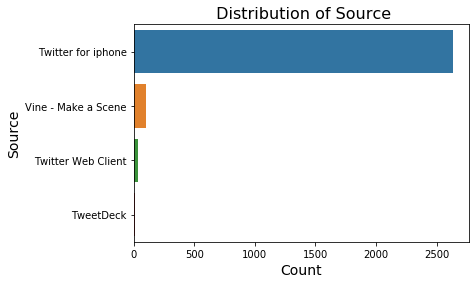

In [71]:
sorted_source = tarchive['source'].value_counts().index
print(tarchive['source'].value_counts())
sns.countplot(data = tarchive, y = 'source', order = sorted_source)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Source', fontsize=14)
plt.title(' Distribution of Source',fontsize=16)


This plot shows that distribution of the source that twitter. it clearly shows 
that people are using iphone as a major source for tweeting. 

In [72]:
tarchive.dogtype.value_counts()

pupper     275
doggo      122
puppo       42
floofer     14
Name: dogtype, dtype: int64

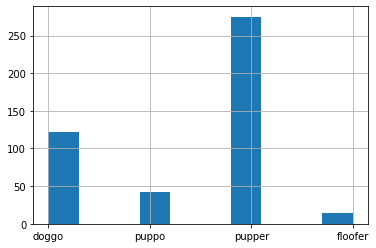

In [73]:
tarchive.dogtype.hist()

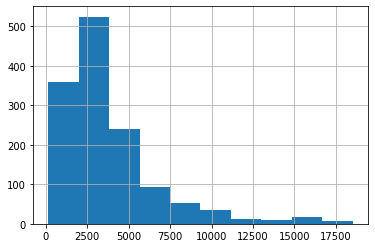

In [74]:
tarchive[tarchive.retweetcount<=20000].retweetcount.hist()

This is the histogram that shows retweet count that has more than 20000

In [75]:
tarchive.favcount.describe()

count      1382.000000
mean      16839.144718
std       13907.954187
min         843.000000
25%        8356.500000
50%       12893.500000
75%       20811.500000
max      128302.000000
Name: favcount, dtype: float64

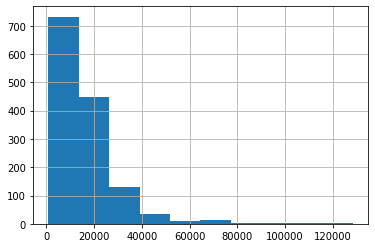

In [76]:
tarchive.favcount.hist()

This is the histogram that shows distribution od the favourite count 

In [77]:
tarchive.name.value_counts().head(20)

None       744
a           58
Charlie     17
Penny       14
Tucker      14
Cooper      14
Lucy        14
Oliver      13
Winston     12
Daisy       11
Bailey      10
Lola        10
Sadie       10
Stanley     10
Bo          10
Toby        10
Koda         9
Rusty        8
Scout        8
Leo          8
Name: name, dtype: int64

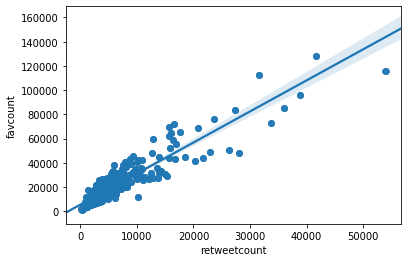

In [78]:
sns.regplot('retweetcount','favcount',tarchive)

This shows the corelation of the  retweeetcount and favcount. It clearly shows that favcount has positive assoication  with retweetcount 